### Exploratory Data Analysis

#### Importing the required libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

#### Loading the data into the data frame

In [88]:
df = pd.read_csv('Datasets/Dataset_5.csv')

In [89]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [90]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


#### Checking the type of data

In [91]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

#### Dropping irrelevent columns

In [92]:
df.drop(['id', 'dataset'], axis=1, inplace=True)

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### Dropping the duplicate rows

In [94]:
df.shape

(920, 14)

In [95]:
duplicated_rows_df = df[df.duplicated()]
print("Number of duplicated rows:", duplicated_rows_df.shape)

Number of duplicated rows: (2, 14)


In [96]:
df.count()

age         920
sex         920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [97]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [98]:
df.count()

age         918
sex         918
cp          918
trestbps    859
chol        889
fbs         828
restecg     916
thalch      863
exang       863
oldpeak     856
slope       611
ca          309
thal        434
num         918
dtype: int64

#### Dropping the missing or null values

In [99]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age           0
sex           0
cp            0
trestbps     59
chol         29
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       307
ca          609
thal        484
num           0
dtype: int64


In [100]:
df.drop(['slope', 'ca','thal'], axis=1, inplace=True)

In [101]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
age          0
sex          0
cp           0
trestbps    59
chol        29
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


In [102]:
print("After dropping these:")
df = df.dropna()
df.count()

After dropping these:


age         739
sex         739
cp          739
trestbps    739
chol        739
fbs         739
restecg     739
thalch      739
exang       739
oldpeak     739
num         739
dtype: int64

In [103]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


#### Deleting outliers

In [104]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
num           int64
dtype: object

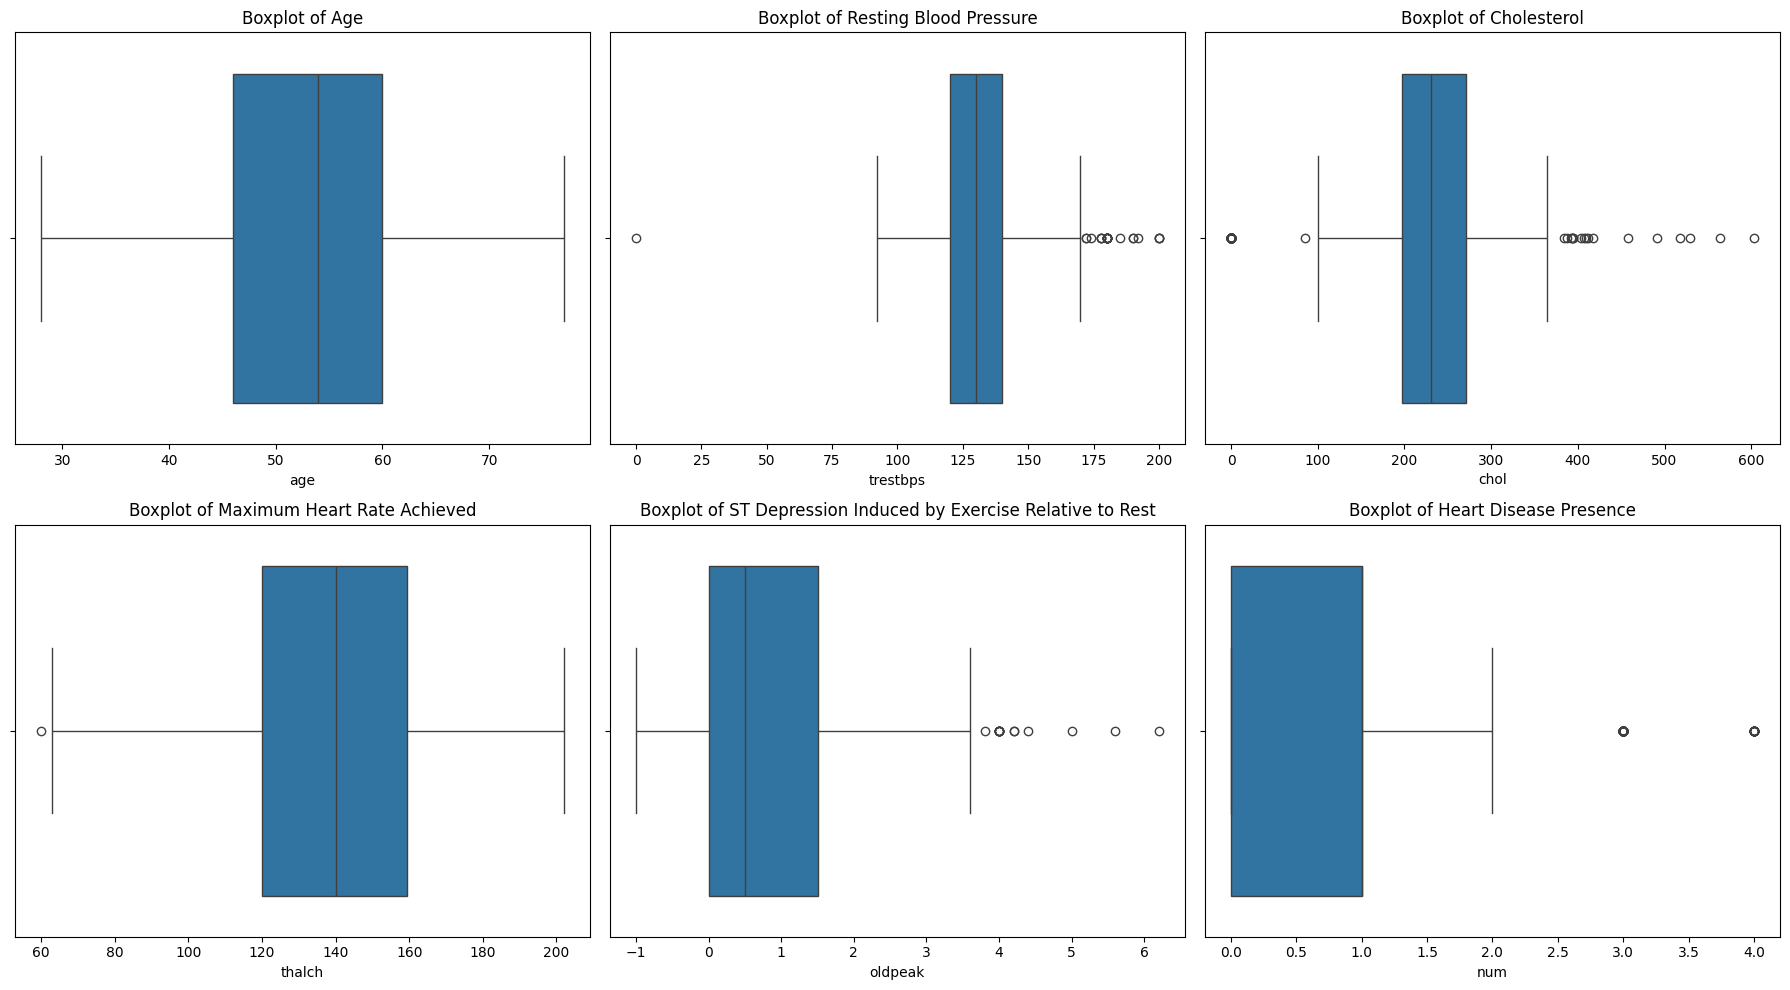

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x=df['age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Age')

sns.boxplot(x=df['trestbps'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Resting Blood Pressure')

sns.boxplot(x=df['chol'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Cholesterol')

sns.boxplot(x=df['thalch'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Maximum Heart Rate Achieved')

sns.boxplot(x=df['oldpeak'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of ST Depression Induced by Exercise Relative to Rest')

sns.boxplot(x=df['num'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot of Heart Disease Presence')

plt.tight_layout()
plt.show()

#### IQR

In [106]:
df_numeric = df.select_dtypes(include=[np.number])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

print("IQR for each numeric column:")
print(IQR)

IQR for each numeric column:
age         14.0
trestbps    20.0
chol        74.0
thalch      39.5
oldpeak      1.5
num          1.0
dtype: float64


In [107]:
filter_no_outliers = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_no_outliers]

print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (552, 11)


#### Plot different features against one another (scatter), against frequency (histogram)

#### Histogram

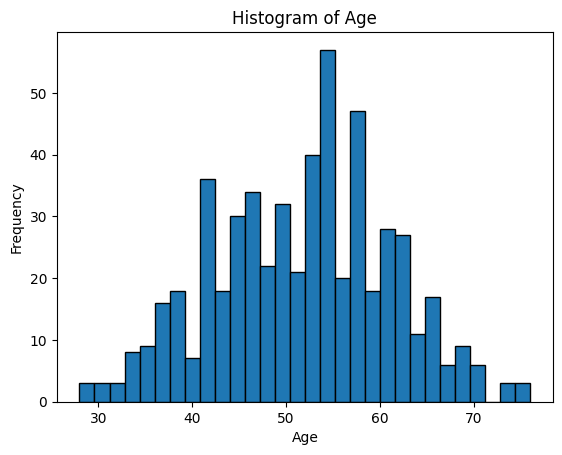

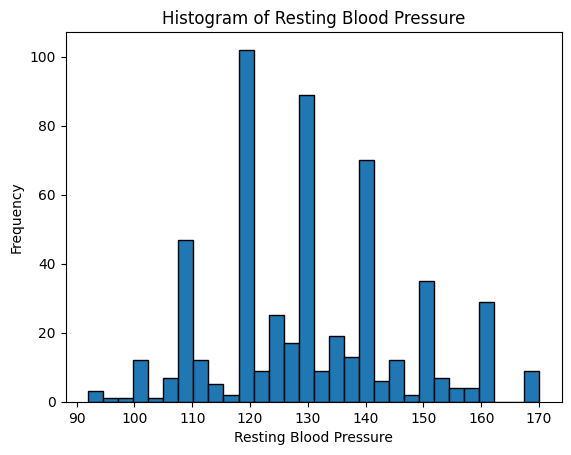

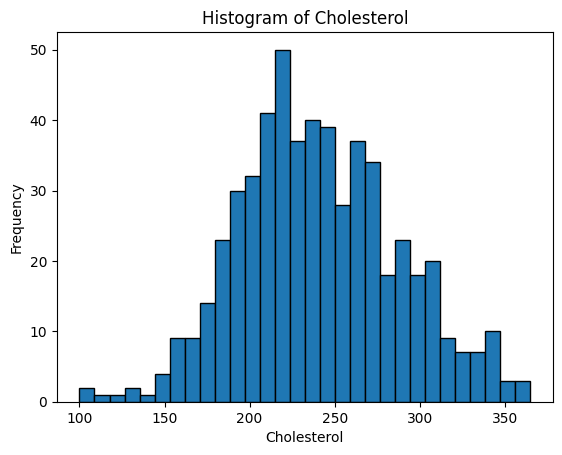

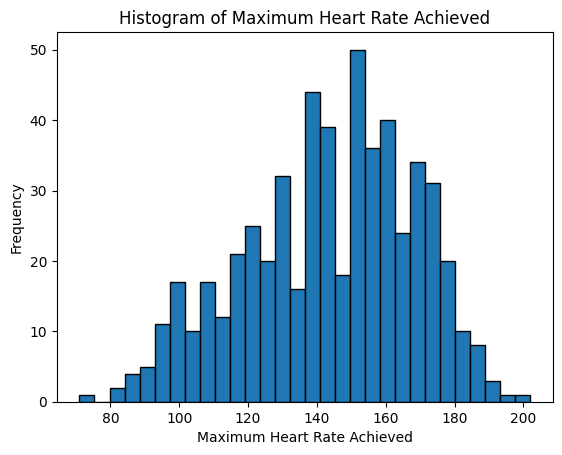

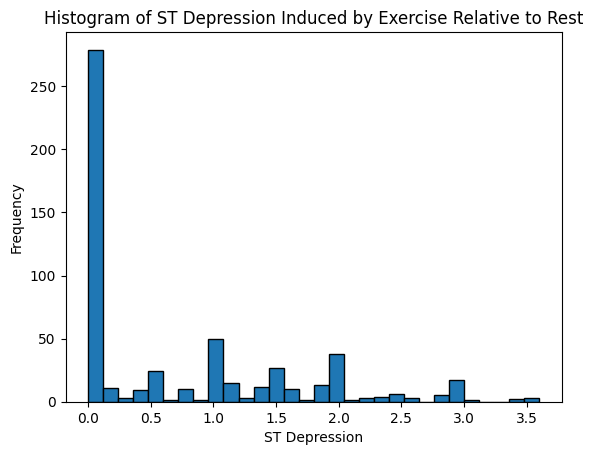

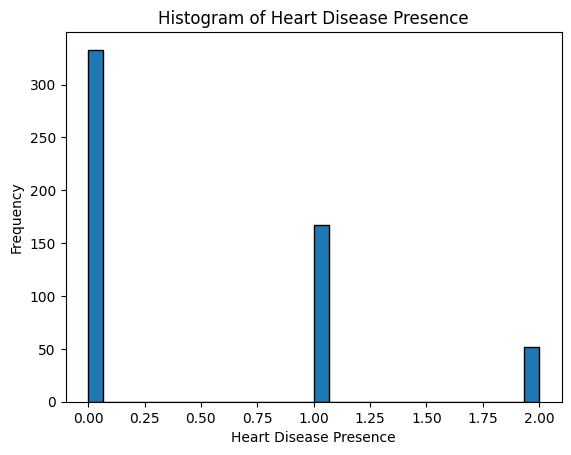

In [108]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['trestbps'], bins=30, edgecolor='black')
plt.title('Histogram of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['chol'], bins=30, edgecolor='black')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['thalch'], bins=30, edgecolor='black')
plt.title('Histogram of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['oldpeak'], bins=30, edgecolor='black')
plt.title('Histogram of ST Depression Induced by Exercise Relative to Rest')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['num'], bins=30, edgecolor='black')
plt.title('Histogram of Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Frequency')
plt.show()

#### Heatmap

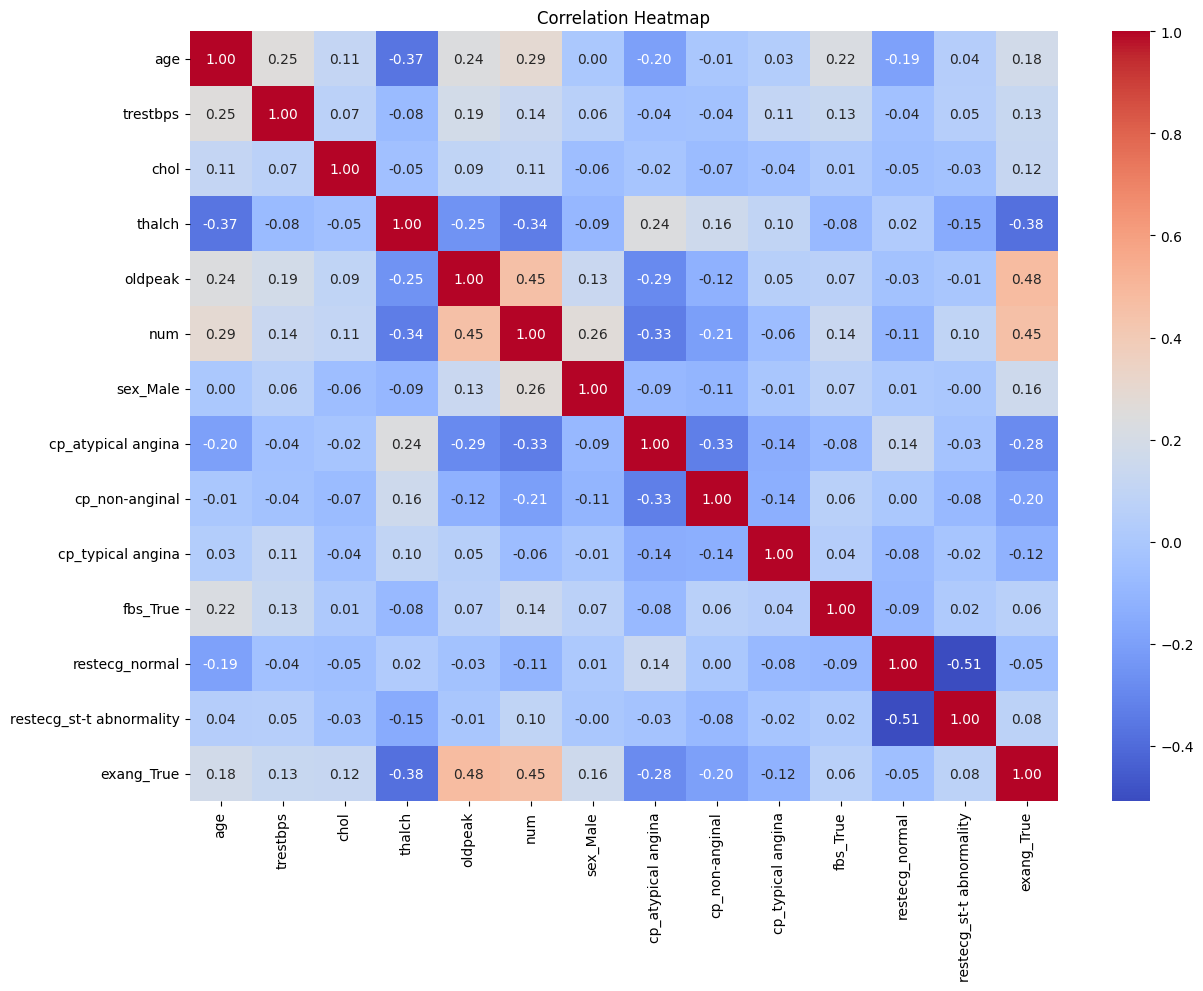

In [109]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Splitting data

In [110]:
df_encoded['target'] = df_encoded['num'].apply(lambda x: 0 if x == 0 else 1)

x = df_encoded.drop(columns=['num', 'target'])
y = df_encoded['target']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Scalling data

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Building and training model

In [113]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proda = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proda)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print("Classification Report:")
    print(report)


Model: Logistic Regression
Accuracy: 0.7658
ROC AUC: 0.8408
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.65      0.72      0.68        39

    accuracy                           0.77       111
   macro avg       0.74      0.75      0.75       111
weighted avg       0.77      0.77      0.77       111


Model: Random Forest
Accuracy: 0.7027
ROC AUC: 0.7568
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.58      0.56      0.57        39

    accuracy                           0.70       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.70      0.70      0.70       111


Model: SVM
Accuracy: 0.7477
ROC AUC: 0.7931
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        72
       

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7117
ROC AUC: 0.7682
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        72
           1       0.59      0.59      0.59        39

    accuracy                           0.71       111
   macro avg       0.68      0.68      0.68       111
weighted avg       0.71      0.71      0.71       111


Model: KNN
Accuracy: 0.6757
ROC AUC: 0.7304
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        72
           1       0.54      0.54      0.54        39

    accuracy                           0.68       111
   macro avg       0.64      0.64      0.64       111
weighted avg       0.68      0.68      0.68       111


Model: Decision Tree
Accuracy: 0.6216
ROC AUC: 0.5849
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        72
           1       0.46      0.46  

#### Plotting all these model performances

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19200\6014654.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_accuracies, y=model_names, palette='viridis')


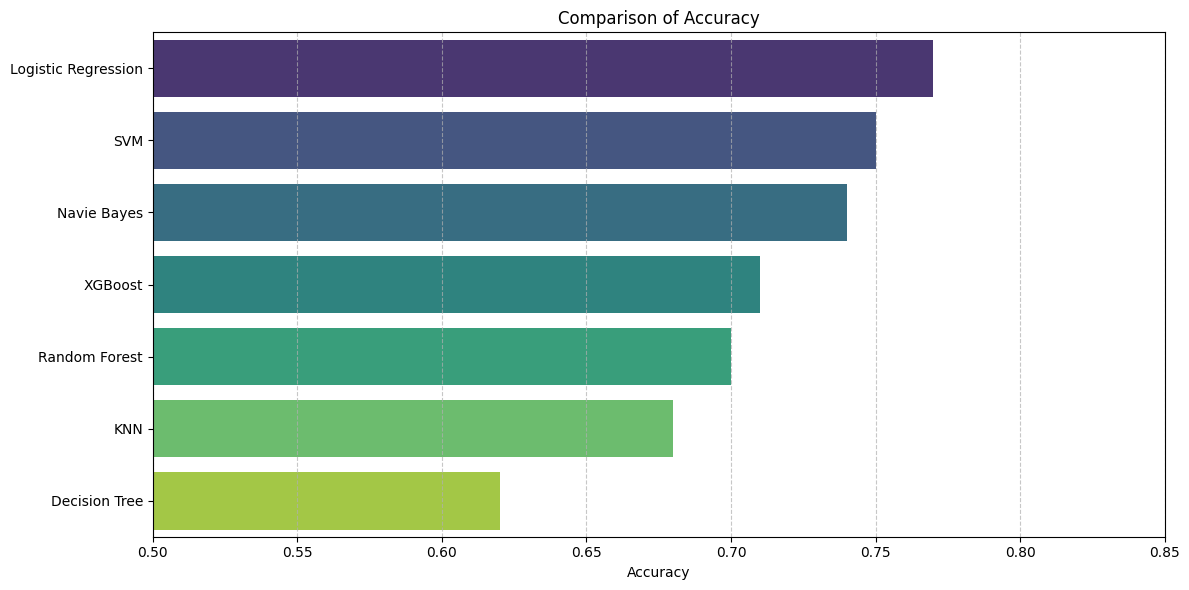

In [114]:
model_names = [
    'Logistic Regression',
    'SVM',
    'Navie Bayes',
    'XGBoost',
    'Random Forest',
    'KNN',
    'Decision Tree'
]

model_accuracies = [0.77, 0.75, 0.74, 0.71, 0.70, 0.68, 0.62]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_accuracies, y=model_names, palette='viridis')
plt.title('Comparison of Accuracy')
plt.xlabel('Accuracy')
plt.xlim(0.5, 0.85)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

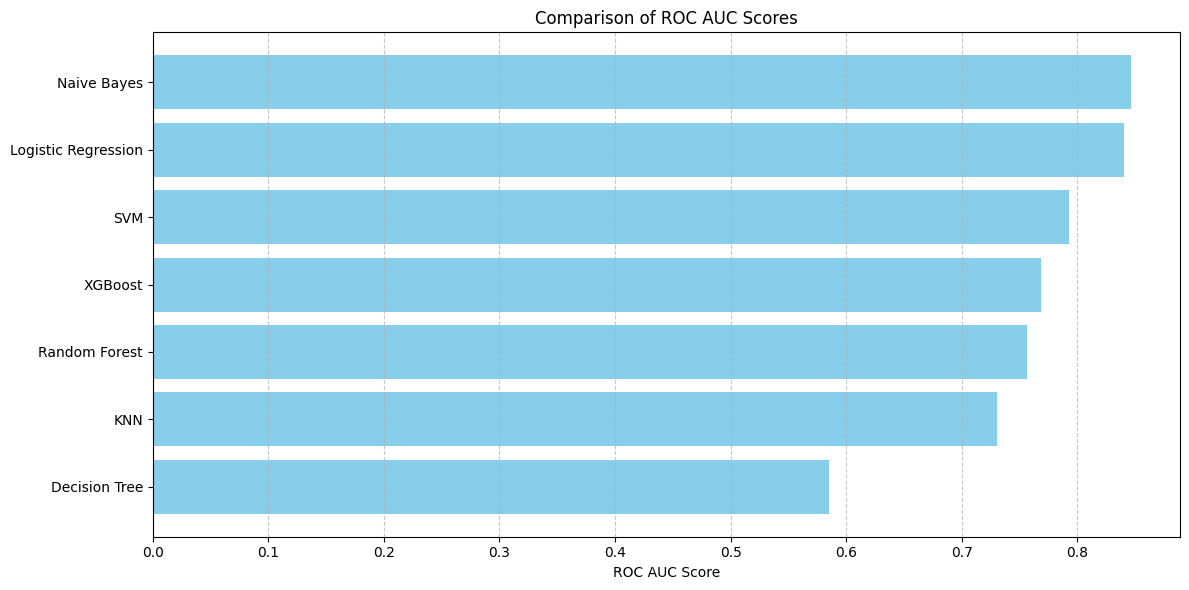

In [115]:
roc_auc_scores = {
    "Logistic Regression": 0.8408,
    "Random Forest": 0.7568,
    "SVM": 0.7931,
    "XGBoost": 0.7682,
    "KNN": 0.7304,
    "Decision Tree": 0.5849,
    "Naive Bayes": 0.8465
}

sorted_models = sorted(roc_auc_scores.items(), key=lambda item: item[1], reverse=True)

plt.figure(figsize=(12, 6))
model_names = [model[0] for model in sorted_models]
roc_scores = [model[1] for model in sorted_models]
plt.barh(model_names, roc_scores, color='skyblue')
plt.title('Comparison of ROC AUC Scores')
plt.xlabel('ROC AUC Score')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19200\2648186690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_r')


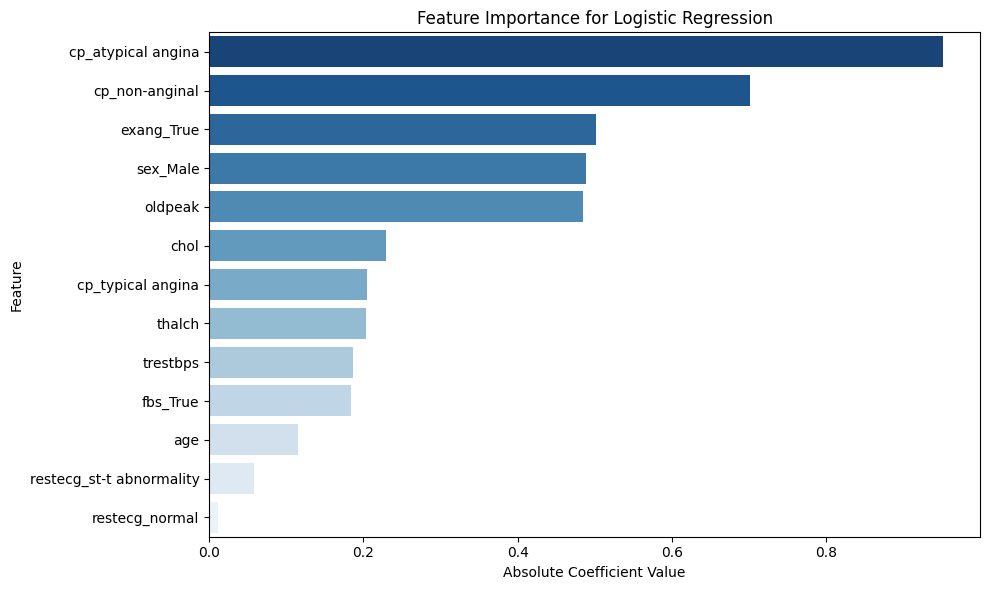

In [118]:
# Get feature importance for Logistic Regression using absolute value of coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_r')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:")
print(grid_search.best_params_)

print("\nBest cross-validated accuracy:", grid_search.best_score_)

Best parameters for Logistic Regression:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Best cross-validated accuracy: 0.802655771195097


In [ ]:
import joblib

# Save the trained model and scaler to disk
joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved for deployment.")

Model and scaler have been saved for deployment.


In [ ]:
import joblib

# Load the trained model and scaler from disk
loaded_model = joblib.load('logreg_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

print("Model and scaler loaded successfully.")

Model and scaler loaded successfully.


In [127]:
# Create a sample input as a DataFrame with the same columns as X_test
sample_data = pd.DataFrame([{
    'age': 55,
    'trestbps': 130.0,
    'chol': 250.0,
    'thalch': 150.0,
    'oldpeak': 1.0,
    'sex_Male': True,
    'cp_atypical angina': False,
    'cp_non-anginal': True,
    'cp_typical angina': False,
    'fbs_True': False,
    'restecg_normal': True,
    'restecg_st-t abnormality': False,
    'exang_True': False
}])

# Scale the sample data using the fitted scaler
sample_scaled = scaler.transform(sample_data)

# Predict using the loaded logistic regression model
sample_pred = loaded_model.predict(sample_scaled)
sample_proba = loaded_model.predict_proba(sample_scaled)

print("Predicted class:", sample_pred[0])
print("Probability of each class:", sample_proba[0])

Predicted class: 0
Probability of each class: [0.76757547 0.23242453]


In [129]:
# Define column names (should match X_test columns)
column_names = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak','sex_Male', 'cp_atypical angina', 'cp_non-anginal', 
    'cp_typical angina','fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True'
]

# Define sample values
sample_values = [
    55,130.0,250.0,150.0,1.0,True,False,True,False,False,True,False,False
]

# Create DataFrame using column names and values
sample_data = pd.DataFrame([sample_values], columns=column_names)

# Scale the sample data using the LOADED scaler (fix the scaler reference)
sample_scaled = loaded_scaler.transform(sample_data)

# Predict using the loaded logistic regression model
sample_pred = loaded_model.predict(sample_scaled)
sample_proba = loaded_model.predict_proba(sample_scaled)

print("Predicted class:", sample_pred[0])
print("Probability of each class:", sample_proba[0])
print(f"Prediction: {'Heart Disease' if sample_pred[0] == 1 else 'No Heart Disease'}")
print(f"Confidence: {max(sample_proba[0]):.2%}")

Predicted class: 0
Probability of each class: [0.76757547 0.23242453]
Prediction: No Heart Disease
Confidence: 76.76%
